In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from netgraph import Graph

In [2]:
# Define the LSE colour
LSE_RED = '#ed1c2e'

### Define the URLs of the pages we will be scraping

In [3]:
dma_url = "https://www.lse.ac.uk/Mathematics/Research/Discrete-Mathematics-and-Algorithms"
fin_url = "https://www.lse.ac.uk/Mathematics/Research/Financial-Mathematics-and-Control-Theory"
game_url = "https://www.lse.ac.uk/Mathematics/Research/Game-Theory"
or_url = "https://www.lse.ac.uk/Mathematics/Research/Operations-Research"

### Create a function to help us scrape a url and return a list of professors
* `DMA` : Discrete Maths and Algorithms
* `FIN` : Financial Maths
* `GAME` : Game Theory
* `OR` : Operational Research

In [4]:
def get_professors(url):
    
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    div = soup.find('div', class_ = "pageContent pageContent--std")
    # Find all headers
    profs = div.find_all('a')
    #return profs
    
    # Extract the text from each header
    profs = [prof.text for prof in profs]
    #return profs
    # Remove the `\xa0` unicode
    profs = [prof.replace('\xa0', ' ') for prof in profs]
    
    # Remove whitespace
    profs = [prof.strip() for prof in profs]
    
    return profs

### Create the 4 lists of professors

In [5]:
dma_profs = get_professors(dma_url)
fin_profs = get_professors(fin_url)
game_profs = get_professors(game_url)
or_profs = get_professors(or_url)

### The lists still require some cleaning

In [6]:
# Clean DMA list
dma_profs.pop(5)
dma_profs = dma_profs[:-8]

In [7]:
# Clean FIN list
fin_profs.pop(0)
fin_profs = fin_profs[:-9]

In [8]:
# Clean GAME list
game_profs.pop(2)
game_profs.pop(3)
game_profs.pop(4)
game_profs = game_profs[:-5]

In [9]:
# Clean OR list
for i in range(6):
    or_profs.pop(1)
or_profs = or_profs[:-8]

### Create a graph to show the different clusters
* We will use Netgraph for the visualisation as it looks slighlty nicer than NetworkX
* But we will use NetworkX to find metrics about the network

In [10]:
# Create a list of the 4 areas
areas = ["DMA", "FIN", "OR", "GAME"]

In [11]:
# Create the start of the graph
area_edges = [("Maths", area) for area in areas]

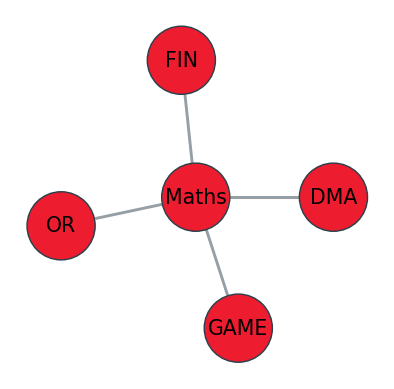

In [12]:
# Initial layout
Graph(area_edges, node_layout='radial', node_size = 12, node_color = LSE_RED, node_labels = True);

### A function to create the edges 

In [13]:
def edges(area, profs):
    edges = [(area, prof) for prof in profs]
    
    return edges

In [14]:
all_profs = dma_profs + fin_profs + game_profs + or_profs

### A bit of cleaning

In [15]:
# Check for duplicates (it will make the visualisation look bad)
pd.Series(all_profs).value_counts()

Dr Robert Simon                   2
Professor Andrew Lewis-Pye        2
Professor Amol Sasane             1
Professor Martin Anthony          1
Professor Graham Brightwell       1
Professor Bernhard von Stengel    1
Professor Peter Allen             1
Professor Jozef Skokan            1
Professor Konrad Swanepoel        1
Dr Emilio Pierro                  1
Dr Galit Ashkenazi-Golan          1
Professor Johannes Ruf            1
                                  1
Dr Tugkan Batu                    1
Dr Ahmad Abdi                     1
Professor Olivier Gossner         1
Dr Aled Williams                  1
Dr Arne Lokka                     1
Professor Adam Ostaszewski        1
Dr Pavel Gapeev                   1
Professor Mihail Zervos           1
Dr Christoph Czichowsky           1
Professor Luitgard Veraart        1
Professor Julia Böttcher          1
Dr Albina Danilova                1
dtype: int64

In [16]:
# Find what areas the dulicates are in
("Dr Robert Simon" in dma_profs, "Dr Robert Simon" in fin_profs, \
"Dr Robert Simon" in game_profs, "Dr Robert Simon" in or_profs)

(True, False, True, False)

In [17]:
# Find what areas the dulicates are in
("Professor Andrew Lewis-Pye" in dma_profs, "Professor Andrew Lewis-Pye" in fin_profs, \
"Professor Andrew Lewis-Pye" in game_profs, "Professor Andrew Lewis-Pye" in or_profs)

(True, False, True, False)

In [18]:
# Remove them from the longer list
dma_profs.remove("Dr Robert Simon")
dma_profs.remove("Professor Andrew Lewis-Pye")

### Create a list with all the edges to professors

In [19]:
#Create the list of all edges in the graph
prof_edges = edges("DMA", dma_profs) + edges("GAME", game_profs) + \
            edges("FIN", fin_profs) + edges("OR", or_profs)

In [20]:
# Create a list with all edges
all_edges = area_edges + prof_edges

In [21]:
# Colouring the edges
area_colour = {area : 'black' for area in area_edges}
dma_colour = {dma_prof : 'purple' for dma_prof in edges("DMA", dma_profs)}
fin_colour = {fin_prof : 'green' for fin_prof in edges("GAME", game_profs)}
game_colour = {game_prof : 'blue' for game_prof in edges("FIN", fin_profs)}
or_colour = {or_prof : 'gold' for or_prof in edges("OR", or_profs)}
colouring = area_colour | dma_colour | fin_colour | game_colour | or_colour

### Final graph layout

C:\Users\bbste\miniconda3\envs\env-1\lib\site-packages\netgraph\_main.py:903: RuntimeWarning: divide by zero encountered in double_scalars
  rescale_factor = min(rescale_factor, diameter/np.sqrt(width**2 + height**2))


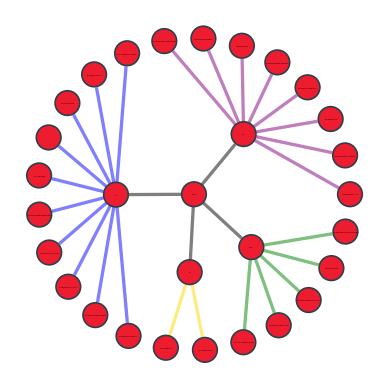

In [22]:
Graph(all_edges, node_layout='radial', node_size = 4, \
      edge_color = colouring, node_color = LSE_RED, node_labels = True);

### Collect the data for interests of professors
* We create a list of lists, where each sub-list has the interests of a professor

In [31]:
def prof_interests(url):

    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    div = soup.find_all('div', class_ = "accordion__txt")
    # Clean the data
    interests = [prof_interests.text for prof_interests in div]
    interests = [prof_interests[1:-2] for prof_interests in interests]
    interests = [prof_interests.replace('\n', '.') for prof_interests in interests]
    interests = [prof_interests.split('.') for prof_interests in interests]
    
    return interests

In [32]:
prof_interests(dma_url)

[['Extremal and probabilistic combinatorics; Ramsey theory; graph and hypergraph theory; quasirandom structures; algorithmic combinatoric'],
 ['Mathematical aspects of machine learning; probabilistic modelling of learning; discrete mathematical problems in the theory of learning; Boolean function classes and their representation'],
 ['Algorithms and the theory of computation; randomised algorithms; sublinear algorithms on massive data sets; property testing; computational statistic'],
 ['Extremal combinatorics; random discrete structures; Ramsey theory; regularity method; graph packing; quasirandomness; algorithmic aspects in combinatoric'],
 ['Combinatorics; finite partially ordered sets; probabilistic methods; algorithmic aspects in combinatorics; random graphs; random structure'],
 ['Graph theory; matroid theory; applications and algorithmic aspects of graph theory; mathematical aspects of frequency assignment problems; network science',
  ''],
 ['Logic; computability; discrete math

### NLP to tokenise the words

### Create a DataFrame
* We will have the professor as a column name
* Then their interests underneath

In [25]:
df = pd.DataFrame(columns = all_profs)

In [26]:
df 

,Professor Peter Allen,Professor Martin Anthony,Dr Tugkan Batu,Professor Julia Böttcher,Professor Graham Brightwell,Professor Andrew Lewis-Pye,Dr Emilio Pierro,Dr Robert Simon,Professor Jozef Skokan,Professor Konrad Swanepoel,...,Professor Amol Sasane,Professor Luitgard Veraart,Professor Mihail Zervos,Dr Galit Ashkenazi-Golan,Professor Olivier Gossner,Professor Andrew Lewis-Pye,Dr Robert Simon,Professor Bernhard von Stengel,Dr Ahmad Abdi,Dr Aled Williams
